# A practical MD Tutorial 
## December 2018 at IBF-CNR 

We'll be using the HTMD library, which is a Python-based package incorporating various MD components and provides simplified system-building functions.

Notes:
* Please copy this file ("File->Make a copy"). You can't overwrite it.
* Evaluate cells using Shift-Enter (=execute contained code)
* HTMD is only available on Linux. You are now using a remote Linux machine. 
* Use "Kernel->Restart" to start from scratch.

Full documentation:
* https://software.acellera.com/docs/latest/htmd/index.html
* https://software.acellera.com/docs/latest/htmd/userguide.html

References:
1. Braun E, Gilmer J, Mayes HB, Mobley DL, Prasad S, Zuckerman DM. Best Practices for Foundations in Molecular Simulations [Article v1.0]. Living J Comp Mol Sci. :28.  https://github.com/MobleyLab/basic_simulation_training/blob/master/paper/basic_training.pdf
1. Knapp B, Ospina L, Deane CM. Avoiding False Positive Conclusions in Molecular Simulation: The Importance of Replicas. J Chem Theory Comput [Internet]. 2018 Oct 24 [cited 2018 Nov 26]; Available from: https://doi.org/10.1021/acs.jctc.8b00391
1. Giorgino T, Analysis libraries for molecular trajectories: a cross-language synopsis. To appear in:  Biomolecular Simulations: Methods and Protocols Edited by M. Bonomi and C. Camilloni (Springer). Preprint. [PDF](https://drive.google.com/open?id=1_mG3Ig6RaKsCJrnNfVDv0n6xa5_b25FE)


In [1]:
1+1

2

# Molecular Dynamics 

## Assumptions


In this tutorial we shall deal with *unbiased* sampling approaches with explicit solvent, i.e. 
* no added forces except the "physical" ones in your system;
* all of the system (including water molecules) have atomic resolution.

Also, current *classical* MD does **not** address, by design, the following:
* Chemical reactions, e.g. catalysis, phosphorylation, ubiquitination etc.
* Protonation changes

Finally, small molecules pose distinct challenges and need a separate, expensive *parameterization* step.


## MD is *entirely* about timescales

Your ability to obtain quantitative results is *severely* limited by the sampling ability you have. You will only be able to reach phenomena occurring on the *sampled* timescales, or shorter. 

* Sidechain rearrangements, diffusion-limited processes: usually possible *
* Local flexibility: usually possible *
* Membrane environment: ok-ish
* Binding: hard but not impossible
* Folding: very hard but not impossible

[*] Unless there are significant barriers.

The following factors affect the running speed (usually expressed in ns per simulation day, ns/day)
* System size. Reasonable is 100 AA ~ 30,000 atoms. 
* Computer speed. Forget laptops. Use GPU if available.
* Software. 

## Biased sampling

If you are prepared to pay the price of adding *a priori* knowledge to your system, one may resort to *biased* sampling approaches, e.g. Metadynamics. This is a different topic; basic MD technology stays the same, but biasing libraries (e.g. [Plumed 2](http://www.plumed.org/)) come into play.

In [2]:
# Ignore the following cell. It's to separate your work files.
import os
pid=os.getpid()
print(f"This session's PID is {pid}, which is also a directory where you will find your files")
try: os.mkdir(f"{pid}") 
except: pass

This session's PID is 11358, which is also a directory where you will find your files


# Step 1. Know and prepare your system

Review your knowledge of the system on the light of what was mentioned before. 

To assess protonation states, submit your PDB to https://playmolecule.org/proteinPrepare/ . Make a note of the non-standard states. See https://software.acellera.com/docs/latest/htmd/tutorials/protein-preparation.html. 

1. Martínez-Rosell G, Giorgino T, De Fabritiis G. PlayMolecule ProteinPrepare: A Web Application for Protein Preparation for Molecular Dynamics Simulations. J Chem Inf Model. 2017 Jul 24;57(7):1511–6. 



# Step 2. Import the HTMD package

In [3]:
from htmd.ui import *
config(viewer='ngl')

ffevaluate module is in beta version

Please cite HTMD: Doerr et al.(2016)JCTC,12,1845. 
https://dx.doi.org/10.1021/acs.jctc.6b00049
Documentation: http://software.acellera.com/



2018-11-30 14:54:44,230 - binstar - INFO - Using Anaconda API: https://api.anaconda.org


You are on the latest HTMD version (1.13.9).



/data/mdtutorial/miniconda/lib/python3.6/site-packages/pyemma/__init__.py:91: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.4, you have 2.4.
  .format(latest=latest, current=current), category=UserWarning)


## Basic Molecule manipulation

In [4]:
g2_nb = Molecule("4S10")
g2_nb

2018-11-30 14:55:00,473 - htmd.molecule.readers - INFO - Attempting PDB query for 4S10


Molecule with 3613 atoms and 1 frames
Atom field - altloc shape: (3613,)
Atom field - atomtype shape: (3613,)
Atom field - beta shape: (3613,)
Atom field - chain shape: (3613,)
Atom field - charge shape: (3613,)
Atom field - coords shape: (3613, 3, 1)
Atom field - element shape: (3613,)
Atom field - insertion shape: (3613,)
Atom field - masses shape: (3613,)
Atom field - name shape: (3613,)
Atom field - occupancy shape: (3613,)
Atom field - record shape: (3613,)
Atom field - resid shape: (3613,)
Atom field - resname shape: (3613,)
Atom field - segid shape: (3613,)
Atom field - serial shape: (3613,)
angles shape: (0, 3)
bonds shape: (34, 2)
bondtype shape: (34,)
box shape: (3, 1)
boxangles shape: (3, 1)
crystalinfo: {'a': 37.597999999999999, 'b': 46.333999999999996, 'c': 76.438000000000002, 'alpha': 103.0, 'beta': 92.030000000000001, 'gamma': 89.849999999999994, 'sGroup': ['P', '1'], 'z': 2, 'numcopies': 1, 'rotations': array([[[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.

In [8]:
?Molecule

In [5]:
# Viewer https://software.acellera.com/docs/latest/htmd/htmd.vmdviewer.html
g2_nb.view()

A Jupyter Widget

In [6]:
g2 = g2_nb.copy()
g2.filter("chain D")
g2.view()

2018-11-28 14:17:04,995 - htmd.molecule.molecule - INFO - Removed 2793 atoms. 820 atoms remaining in the molecule.


A Jupyter Widget

In [7]:
nb = g2_nb.copy()
nb.filter("chain A")
nb.view()

2018-11-28 14:17:05,152 - htmd.molecule.molecule - INFO - Removed 2627 atoms. 986 atoms remaining in the molecule.


A Jupyter Widget

* Note that `nb` etc. are *objects* of type `Molecule`.
* You may apply transformations, get properties, and so on. 
* The objective is to make the notebook *reproducible*.
* For help, see `?Molecule` and https://software.acellera.com/docs/latest/htmd/molecule.html

In [9]:
nb.get('beta',sel='name CA')

array([ 53.83000183,  48.11999893,  40.29000092,  26.27000046,
        35.34999847,  26.84000015,  29.07999992,  30.26000023,
        42.65000153,  45.81000137,  44.59000015,  54.88999939,
        61.95999908,  51.45999908,  54.47000122,  40.20999908,
        38.38000107,  30.5       ,  45.04999924,  38.61999893,
        46.20000076,  29.95999908,  30.01000023,  30.95000076,
        44.25999832,  29.70000076,  26.42000008,  40.15000153,
        46.61999893,  33.74000168,  33.09999847,  37.5       ,
        39.70000076,  28.57999992,  36.34999847,  27.55999947,
        30.55999947,  38.52000046,  33.33000183,  48.40999985,
        61.45000076,  60.70000076,  59.11000061,  48.11000061,
        35.29000092,  34.84999847,  29.13999939,  44.58000183,
        34.18999863,  25.76000023,  44.79999924,  32.68999863,
        34.72000122,  45.52000046,  57.20000076,  47.31999969,
        42.63000107,  37.72999954,  41.        ,  35.47000122,
        33.68999863,  48.81999969,  56.63000107,  36.09

In [10]:
nb_beta = nb.get('beta',sel='name CA')
nb_beta

array([ 53.83000183,  48.11999893,  40.29000092,  26.27000046,
        35.34999847,  26.84000015,  29.07999992,  30.26000023,
        42.65000153,  45.81000137,  44.59000015,  54.88999939,
        61.95999908,  51.45999908,  54.47000122,  40.20999908,
        38.38000107,  30.5       ,  45.04999924,  38.61999893,
        46.20000076,  29.95999908,  30.01000023,  30.95000076,
        44.25999832,  29.70000076,  26.42000008,  40.15000153,
        46.61999893,  33.74000168,  33.09999847,  37.5       ,
        39.70000076,  28.57999992,  36.34999847,  27.55999947,
        30.55999947,  38.52000046,  33.33000183,  48.40999985,
        61.45000076,  60.70000076,  59.11000061,  48.11000061,
        35.29000092,  34.84999847,  29.13999939,  44.58000183,
        34.18999863,  25.76000023,  44.79999924,  32.68999863,
        34.72000122,  45.52000046,  57.20000076,  47.31999969,
        42.63000107,  37.72999954,  41.        ,  35.47000122,
        33.68999863,  48.81999969,  56.63000107,  36.09

In [11]:
# To save to a file...
import numpy
numpy.savetxt(f"{pid}/nb_beta.csv",nb_beta)
# !head nb_beta.csv

# Step 3. System building

Building consists in applying the necessary forcefield terms (tabulated potentials) to each atom, atom pair, and so on.

Building needs be done with an eye on the chosen forcefield. Each has strengths and weaknesses. Generally useful are **Amber** and **Charmm**. 

Underlaying system-building software is very different and tricky. Here HTMD makes things simple for us.

Inspiration: https://software.acellera.com/docs/latest/htmd/tutorials/system-building-protein-ligand.html

In [12]:
prot = autoSegment(g2, sel='protein')
prot.set('segid', 'W', sel='water')
prot.set('segid', 'CA', sel='resname CA')

prot.center()


In [13]:
from htmd.molecule.util import maxDistance
D = maxDistance(prot, 'all')
print(D)

23.3182922158


## Solvation

There needs be at least ~8 Å per side.

In [14]:
DW = D + 8
smol = solvate(prot, minmax=[[-DW, -DW, -DW], [DW, DW, DW]])
smol.reps.add(sel='water', style='Lines')
smol.reps.add(sel="protein", style="Cartoon")
smol.view()

2018-11-28 14:17:05,588 - htmd.builder.solvate - INFO - Using water pdb file at: /data/mdtutorial/miniconda/lib/python3.6/site-packages/htmd/builder/wat.pdb
2018-11-28 14:17:06,472 - htmd.builder.solvate - INFO - Replicating 8 water segments, 2 by 2 by 2
Solvating: 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]
2018-11-28 14:17:10,406 - htmd.builder.solvate - INFO - 7207 water molecules were added to the system.


A Jupyter Widget

In [15]:
bmol_amber = amber.build(smol, outdir=f"{pid}/build_amber")

2018-11-28 14:17:14,726 - htmd.builder.amber - INFO - Starting the build.
2018-11-28 14:17:16,714 - htmd.builder.amber - INFO - Finished building.
2018-11-28 14:17:17,883 - htmd.builder.ionize - INFO - Adding 0 anions + 0 cations for neutralizing and 0 ions for the given salt concentration.
2018-11-28 14:17:18,383 - htmd.builder.builder - WARNING - Segments ['P0'] contain both protein and non-protein atoms. Please assign separate segments to them or the build procedure might fail.
2018-11-28 14:17:19,044 - htmd.builder.amber - INFO - Detecting disulfide bonds.
2018-11-28 14:17:19,052 - htmd.builder.builder - INFO - One disulfide bond was added


Disulfide Bond between: UniqueResidueID<resname: 'CYS', chain: 'D', resid: 188, insertion: '', segid: 'P0'>
                   and: UniqueResidueID<resname: 'CYS', chain: 'D', resid: 201, insertion: '', segid: 'P0'>



2018-11-28 14:17:19,873 - htmd.builder.amber - INFO - Starting the build.
2018-11-28 14:17:21,915 - htmd.builder.amber - INFO - Finished building.


In [16]:
! ls -l build_amber

ls: cannot access 'build_amber': No such file or directory


In [17]:
bmol_amber.view(sel='not water') # visualize the charmm built system

A Jupyter Widget

# Step 4. Simulate

This requires that 
1. the system building steps worked correctly
2. you have the appropriate software and hardware (in this case ACEMD+GPU)

## Equilibration protocol

The initial equilibration ensures the system is thermalized, pressured, and so on. Here we use a "protocol".

In [18]:
from htmd.protocols.equilibration_v2 import Equilibration

md = Equilibration()
md.runtime = 1000          # <-- this is too short. only for tutorial purposes
md.timeunits = 'fs'
md.temperature = 300
md.useconstantratio = False  # only for membrane sims

md.write(f"./{pid}/build_amber", f"{pid}/equil")

In [19]:
local = LocalGPUQueue()
local.submit(f"{pid}/equil")
local.wait()

2018-11-28 14:17:32,604 - htmd.queues.localqueue - INFO - Trying to determine all GPU devices
2018-11-28 14:17:32,685 - htmd.queues.localqueue - INFO - Using GPU devices 0,1,2
2018-11-28 14:17:32,806 - htmd.queues.localqueue - INFO - Trying to determine all GPU devices
2018-11-28 14:17:32,883 - htmd.queues.localqueue - INFO - Using GPU devices 0,1,2
2018-11-28 14:17:32,887 - htmd.queues.localqueue - INFO - Queueing /data/mdtutorial/tutorial/29466/equil
2018-11-28 14:17:32,889 - htmd.queues.localqueue - INFO - Running /data/mdtutorial/tutorial/29466/equil on device 0
2018-11-28 14:17:56,426 - htmd.queues.localqueue - INFO - Completed /data/mdtutorial/tutorial/29466/equil


## Production protocol

This is where we extract results from.

In [20]:
from htmd.protocols.production_v6 import Production

md = Production()
md.runtime = 1  # <-- this is too short. only for tutorial purposes
md.timeunits = 'ns'
md.temperature  = 300
md.acemd.bincoordinates = 'output.coor'
md.acemd.extendedsystem  = 'output.xsc'
md.write(f"{pid}/equil",f"{pid}/prod")

In [21]:
local.submit(f"{pid}/prod")
local.wait()

2018-11-28 14:17:59,014 - htmd.queues.localqueue - INFO - Trying to determine all GPU devices
2018-11-28 14:17:59,094 - htmd.queues.localqueue - INFO - Using GPU devices 0,1,2
2018-11-28 14:17:59,220 - htmd.queues.localqueue - INFO - Trying to determine all GPU devices
2018-11-28 14:17:59,305 - htmd.queues.localqueue - INFO - Using GPU devices 0,1,2
2018-11-28 14:17:59,307 - htmd.queues.localqueue - INFO - Queueing /data/mdtutorial/tutorial/29466/prod
2018-11-28 14:17:59,308 - htmd.queues.localqueue - INFO - Running /data/mdtutorial/tutorial/29466/prod on device 0
2018-11-28 14:21:09,295 - htmd.queues.localqueue - INFO - Completed /data/mdtutorial/tutorial/29466/prod


## Visualization

In [24]:
traj = Molecule(f"{pid}/prod/structure.pdb")
traj.read(f"{pid}/prod/output.xtc")
traj.wrap()
traj.align('protein and name CA')
traj.view()

A Jupyter Widget

## Analysis (trivial example)

In [32]:
gsn_run = Molecule("D187N+Nb-run/structure.psf")
gsn_run.read("D187N+Nb-run/output.xtc")


In [33]:
gsn_run

Molecule with 43282 atoms and 5122 frames
Atom field - altloc shape: (43282,)
Atom field - atomtype shape: (43282,)
Atom field - beta shape: (43282,)
Atom field - chain shape: (43282,)
Atom field - charge shape: (43282,)
Atom field - coords shape: (43282, 3, 5122)
Atom field - element shape: (43282,)
Atom field - insertion shape: (43282,)
Atom field - masses shape: (43282,)
Atom field - name shape: (43282,)
Atom field - occupancy shape: (43282,)
Atom field - record shape: (43282,)
Atom field - resid shape: (43282,)
Atom field - resname shape: (43282,)
Atom field - segid shape: (43282,)
Atom field - serial shape: (43282,)
angles shape: (19522, 3)
bonds shape: (43260, 2)
bondtype shape: (43260,)
box shape: (3, 5122)
boxangles shape: (3, 5122)
crystalinfo: None
dihedrals shape: (9163, 4)
fileloc shape: (5122, 2)
impropers shape: (663, 4)
reps: 
ssbonds shape: (0,)
step shape: (5122,)
time shape: (5122,)
topoloc: /data/mdtutorial/tutorial/D187N+Nb-run/structure.psf
viewname: structure.psf

In [35]:
gsn_run.filter("name CA")

2018-11-30 17:08:04,325 - htmd.molecule.molecule - INFO - Removed 43054 atoms. 228 atoms remaining in the molecule.


array([    0,     1,     2, ..., 43279, 43280, 43281], dtype=int32)

In [36]:
gsn_run

Molecule with 228 atoms and 5122 frames
Atom field - altloc shape: (228,)
Atom field - atomtype shape: (228,)
Atom field - beta shape: (228,)
Atom field - chain shape: (228,)
Atom field - charge shape: (228,)
Atom field - coords shape: (228, 3, 5122)
Atom field - element shape: (228,)
Atom field - insertion shape: (228,)
Atom field - masses shape: (228,)
Atom field - name shape: (228,)
Atom field - occupancy shape: (228,)
Atom field - record shape: (228,)
Atom field - resid shape: (228,)
Atom field - resname shape: (228,)
Atom field - segid shape: (228,)
Atom field - serial shape: (228,)
angles shape: (0, 3)
bonds shape: (0, 2)
bondtype shape: (0,)
box shape: (3, 5122)
boxangles shape: (3, 5122)
crystalinfo: None
dihedrals shape: (0, 4)
fileloc shape: (5122, 2)
impropers shape: (0, 4)
reps: 
ssbonds shape: (0,)
step shape: (5122,)
time shape: (5122,)
topoloc: /data/mdtutorial/tutorial/D187N+Nb-run/structure.psf
viewname: structure.psf

In [37]:
gsn_run.view()

A Jupyter Widget

In [77]:
rmsf_metric = MetricFluctuation(gsn_run,atomsel="resid < 150",trajalnstr="resid < 150",centerstr="resid < 150")
rmsf = rmsf_metric.project(gsn_run)

2018-11-30 17:39:21,550 - htmd.projections.metriccoordinate - WARNING - The order of arguments in MetricCoordinate has changed since 1.12.0. Please look at the updated documentation of the class.


In [78]:
rmsf

array([[ 2.4970665 ,  1.01393127,  1.58131814, ...,  0.43161541,
         0.11773723,  0.1620343 ],
       [ 1.75484228,  1.55687678,  1.38850236, ...,  0.35880643,
         0.50770849,  0.6359216 ],
       [ 4.42371035,  1.34161961,  0.77180105, ...,  0.0578604 ,
         0.1406533 ,  0.48532656],
       ..., 
       [ 1.02512836,  0.82728767,  0.65725732, ...,  0.11573555,
         0.19610146,  0.02382283],
       [ 3.05601835,  1.55239058,  0.37056795, ...,  0.11327742,
         0.23821899,  1.08614182],
       [ 2.11734009,  0.3616389 ,  0.0242546 , ...,  0.38470921,
         0.39262938,  0.98693323]])

In [79]:
Tmax=rmsf.shape[0]/10
rmsf.shape

(5122, 126)

In [80]:
print(gsn_run.get("resid",sel="resid  < 150"))
print(gsn_run.get("resid",sel="resid  > 150"))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126]
[160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261]


In [81]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)

Populating the interactive namespace from numpy and matplotlib


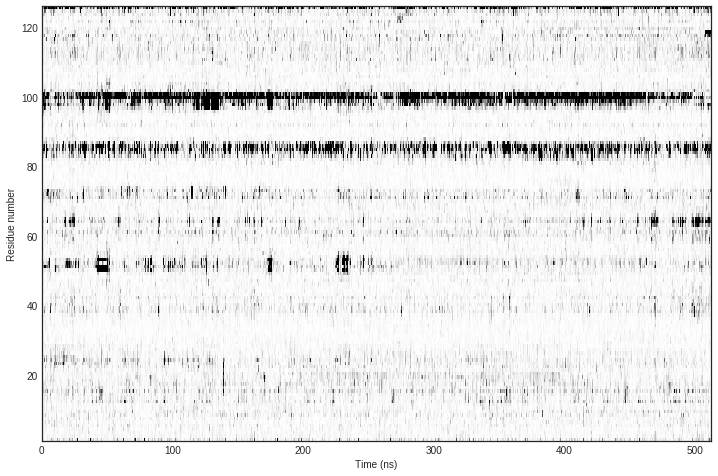

In [82]:
plt.imshow(rmsf.T,aspect='auto',vmax=3, extent=[0,Tmax,1,126])
plt.xlabel("Time (ns)");
plt.ylabel("Residue number");

2018-11-30 17:39:31,757 - htmd.projections.metriccoordinate - WARNING - The order of arguments in MetricCoordinate has changed since 1.12.0. Please look at the updated documentation of the class.


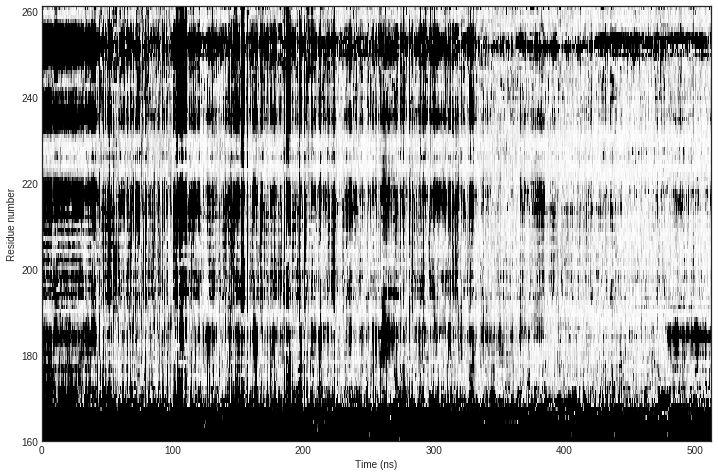

In [84]:
rmsf_metric = MetricFluctuation(gsn_run,atomsel="resid > 150",trajalnstr="resid > 150",centerstr="resid > 150")
rmsf = rmsf_metric.project(gsn_run)

plt.imshow(rmsf.T,aspect='auto',vmax=3, extent=[0,Tmax,160,261])
plt.xlabel("Time (ns)");
plt.ylabel("Residue number");

In [83]:
?plt.imshow